# Load libraries

In [1]:
import numpy as np
import pandas as pd
import os
import re

from datetime import datetime

# Specify git executable file for GitPython in Jupyter Notebook (In IDE, it can still work without this line.)
os.environ["GIT_PYTHON_GIT_EXECUTABLE"] = "C:\Program Files\Git\cmd\git.exe"

import git
from git import RemoteProgress

from git import Repo
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Clone repo from GitHub

Link: https://git-scm.com/docs/git-clone <br>
<b>Note:</b> In case too-long file path issue occurs in Windows, set <code>git config --system core.longpaths true</code>

In [2]:
class Progress(RemoteProgress):
    def update(self, op_code, cur_count, max_count=None, message=''):
        print(self._cur_line)

In [3]:
class Developers:
    developer = []

In [4]:
#remote_link = "https://github.com/apache/camel"
local_link = "camel"
# Uncomment to clone
# Repo.clone_from(remote_link, local_link, progress=Progress())

In [5]:
repo = Repo(local_link)
fixing_commit = "d4102512147eca2af21c3b6ed63a67d852f4e66"
affected_file = {"components/camel-jackson/src/main/java/org/apache/camel/component/jackson/JacksonDataFormat.java",
                "components/camel-jackson/src/test/java/org/apache/camel/component/jackson/JacksonMarshalUnmarshalTypeHeaderTest.java"}

# A. Show Message and Title of Fixing Commit
Link: https://git-scm.com/docs/git-show
You can explore different parameters.

In [6]:
show_data = repo.git.show("-s", fixing_commit).splitlines()
for line in show_data:
    print(line)

commit d4102512147eca2af21c3b6ed63a67d852f4e66a
Author: Andrea Cosentino <ancosen@gmail.com>
Date:   Thu Dec 8 09:51:19 2016 +0100

    CAMEL-10567: Camel-Jackson: Add an option to allow the UnmarshallType header use


# B. Show Total files affected in fixing commit

In [6]:
show_total_files = repo.git.show("--pretty=""","--stat", fixing_commit)
print(show_total_files)

 .../apache/camel/component/jackson/JacksonDataFormat.java    | 12 ++++++------
 .../jackson/JacksonMarshalUnmarshalTypeHeaderTest.java       |  2 +-
 2 files changed, 7 insertions(+), 7 deletions(-)


# C. Show Total directories affected in fixing commit

In [7]:
show_total_dir = repo.git.show("--dirstat", fixing_commit)
print(show_total_dir)

commit d4102512147eca2af21c3b6ed63a67d852f4e66a
Author: Andrea Cosentino <ancosen@gmail.com>
Date:   Thu Dec 8 09:51:19 2016 +0100

    CAMEL-10567: Camel-Jackson: Add an option to allow the UnmarshallType header use

  84.9% components/camel-jackson/src/main/java/org/apache/camel/component/jackson/
  15.0% components/camel-jackson/src/test/java/org/apache/camel/component/jackson/


# D. Total lines of code deleted (Including comments and blank lines)

In [8]:
show_total_lines_deleted = repo.git.show("--shortstat", fixing_commit).splitlines()
show_total_lines_deleted.reverse()
show_total_lines_deleted = show_total_lines_deleted[0].split(",")
show_total_lines_deleted = show_total_lines_deleted[2].split(" ")
print("Total lines of code deleted <Including comments and blank lines> = "+show_total_lines_deleted[1])

Total lines of code deleted <Including comments and blank lines> = 7


# E. Total lines of code added (Including comments and blank lines)

In [9]:
show_total_lines_added = repo.git.show("--shortstat", fixing_commit).splitlines()
show_total_lines_added.reverse()
show_total_lines_added = show_total_lines_added[0].split(",")
show_total_lines_added = show_total_lines_added[1].split(" ")
print("Total lines of code Added <Including comments and blank lines> = "+show_total_lines_added[1])

Total lines of code Added <Including comments and blank lines> = 7


# F. Total lines of code deleted (Excluding comments and blank lines)

In [10]:
show_total_lines_del = repo.git.show("-U0","--pretty=""",fixing_commit).splitlines()
#print(show_total_lines_del)
temp_line = []
t_l_del = 0
for line in show_total_lines_del:
    if re.search("^-",line):
        l = line.split(" ")
        if(len(l) > 3):
            if(len(l[0]) == 1):
                if(l[1][:1] != '*' or l[1][:1] != '/'):
                    print(line)
                    t_l_del += 1
                    
print("Total Lines Deleted <Excluding comments and blank lines> = "+ str(t_l_del))

-    private boolean allowJacksonUnmarshallType;
-        if (allowJacksonUnmarshallType) {
-    public boolean isAllowJacksonUnmarshallType() {
-        return allowJacksonUnmarshallType;
-    public void setAllowJacksonUnmarshallType(boolean allowJacksonUnmarshallType) {
-        this.allowJacksonUnmarshallType = allowJacksonUnmarshallType;
-                format.setAllowJacksonUnmarshallType(true);
Total Lines Deleted <Excluding comments and blank lines> = 7


# G. Total lines of code added (Excluding comments and blank lines)

In [11]:
show_total_lines_add = repo.git.show("-U0","--pretty=""",fixing_commit).splitlines()
#print(show_total_lines_add)
temp_line_add = []
t_l_add = 0
for line in show_total_lines_add:
    #check for + symbol in beginning of line
    if re.search("^\+",line):
        l = line.split(" ")
        #If length is less than 3 it is blank line
        if(len(l) > 3):
            #Avoids lines like +++ 
            if(len(l[0]) == 1):
                #Checks for comments in the line
                if(l[1][:1] != '*' or l[1][:1] != '/'):
                    print(line)
                    t_l_add += 1
                    
print("Total Lines Added <Excluding comments and blank lines> = "+ str(t_l_add))

+    private boolean allowUnmarshallType;
+        if (allowUnmarshallType) {
+    public boolean isAllowUnmarshallType() {
+        return allowUnmarshallType;
+    public void setAllowUnmarshallType(boolean allowJacksonUnmarshallType) {
+        this.allowUnmarshallType = allowJacksonUnmarshallType;
+                format.setAllowUnmarshallType(true);
Total Lines Added <Excluding comments and blank lines> = 7


# H. Number of Days between current fixing commit and the previous commit of each affected file

In [12]:
fileNum = 1
for af in affected_file:
    no_of_days = repo.git.log("-2","--pretty=fuller","--format=%cd", fixing_commit,"--",af).splitlines()
    #print(no_of_days)
    date1 = datetime.strptime(no_of_days[0],'%a %b %d %X %Y %z')
    #print(date1)
    date2 = datetime.strptime(no_of_days[1],'%a %b %d %X %Y %z')
    #print(date2)
    diffDate = abs((date1-date2).days)
    print("File "+str(fileNum)+ " = "+ af)
    print("No of Days = "+ str(diffDate))
    fileNum+=1

File 1 = components/camel-jackson/src/main/java/org/apache/camel/component/jackson/JacksonDataFormat.java
No of Days = 0
File 2 = components/camel-jackson/src/test/java/org/apache/camel/component/jackson/JacksonMarshalUnmarshalTypeHeaderTest.java
No of Days = 0


# I. Times the affected file of fixing commit modified in the past since their creation

In [82]:
fileNum = 1
for af in affected_file:
    times_file_modified = repo.git.log("--follow","--format=%h", fixing_commit,"--",af).splitlines()
    print("File "+str(fileNum)+ " = "+ af)
    print("No of times Modified = "+str(len(times_file_modified)))
    fileNum+=1

File 1 = components/camel-jackson/src/main/java/org/apache/camel/component/jackson/JacksonDataFormat.java
No of times Modified = 23
File 2 = components/camel-jackson/src/test/java/org/apache/camel/component/jackson/JacksonMarshalUnmarshalTypeHeaderTest.java
No of times Modified = 18


# J. Developers modified each affected file since its creation

In [32]:
fileNum = 1
developers
for af in affected_file:
    developersList = repo.git.log("--follow","--format=%an", fixing_commit,"--",af).splitlines()
    #print(developersList)
    dSet = set(developersList)
    developers.update(dSet)
    print("File "+str(fileNum)+ " = "+ af)
    print(dSet)
    fileNum+=1
print(developers)
print(len(developers))

File 1 = components/camel-jackson/src/main/java/org/apache/camel/component/jackson/JacksonDataFormat.java
{'Willem Jiang', 'Claus Ibsen', 'Richard Kettelerij', 'Daniel Kulp', 'Andrea Cosentino'}
File 2 = components/camel-jackson/src/test/java/org/apache/camel/component/jackson/JacksonMarshalUnmarshalTypeHeaderTest.java
{'Claus Ibsen', 'Willem Ning Jiang', 'Willem Jiang', 'Andrea Cosentino'}
{'Willem Ning Jiang', 'Willem Jiang', 'Claus Ibsen', 'Richard Kettelerij', 'Daniel Kulp', 'Andrea Cosentino'}
6


# K. Commits performed by developers

In [27]:
commit_authors = repo.git.shortlog("-sn", "--all").splitlines()
author_commits = []
authors = []
for commit_author in commit_authors:
    commit, author = commit_author.split("\t")
    for d in developers:
        if(d == author):
            author_commits.append([int(commit), author])

In [31]:
df = pd.DataFrame(author_commits, columns=['Commit', 'Author'])
print(author_commits)

[[19604, 'Claus Ibsen'], [7661, 'Andrea Cosentino'], [3601, 'Willem Ning Jiang'], [2300, 'Willem Jiang'], [390, 'Daniel Kulp'], [36, 'Richard Kettelerij']]


In [29]:
df.head()

,Commit,Author
0,19604,Claus Ibsen
1,7661,Andrea Cosentino
2,3601,Willem Ning Jiang
3,2300,Willem Jiang
4,390,Daniel Kulp


## Developers commit

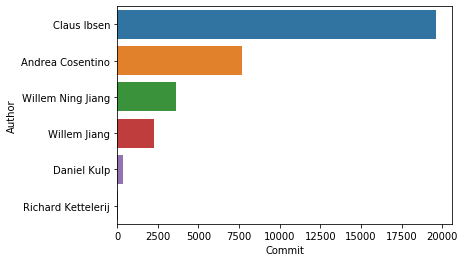

In [25]:
sns.barplot(y='Author', x="Commit", data=df[:len(developers)])